We will be creating a model to detect the customer who are more likely to leave the telecom service

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('TelcoChurn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#display all the columns 
pd.set_option('display.max_columns', None)

In [8]:
#warning suppression
import warnings 
warnings.filterwarnings('ignore')

In [9]:
# checking if there's a null value in customer id before removing the feature
df['customerID'].isnull().sum()

0

In [10]:
df.drop(['customerID'], axis=1, inplace=True)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
#labeling the churn feature to 1/0
df['target'] = np.where(df['Churn'] == "Yes",1,0)

In [14]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'target'],
      dtype='object')

In [57]:
#separating target and independent features
Y = df[['target']]
X = df.drop(columns=['target', 'Churn'], axis=1)

In [58]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [59]:
# Checking the churning rate
Y.mean() 

target    0.26537
dtype: float64

It means that 26% of the customers are leaving the telecom services

In [60]:
#Splitting features into numerical and categorical
X_num = X.select_dtypes(include="number")
X_cat = X.select_dtypes(include="object")

In [61]:
X_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [62]:
X_num.isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [63]:
X_num['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [64]:
X_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [65]:
#dropping the 'senior citizen' feature to build a separate DataFrame as it is categorical in nature
ind = X_num[['SeniorCitizen']]
X_num.drop(['SeniorCitizen'], axis=1, inplace=True)

In [66]:
#analysing outliers
X_num.describe(percentiles=[0.01, 0.15, 0.25, 0.4, 0.5, 0.6, 0.75, 0.85, 0.95, 0.99]).T

,count,mean,std,min,1%,15%,25%,40%,50%,60%,75%,85%,95%,99%,max
tenure,7043.0,32.371149,24.559481,0.00,1.000,3.00,9.00,20.00,29.00,40.00,55.00,65.000,72.000,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,19.200,20.60,35.50,58.83,70.35,79.10,89.85,98.550,107.400,114.729,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,19.871,162.45,398.55,939.78,1394.55,2043.71,3786.60,5195.485,6921.025,8039.256,8684.80


In [67]:
#capping and flooring of outliers
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.05))
    x=x.clip(upper=x.quantile(0.95))
    return(x)

In [68]:
X_num = X_num.apply(lambda x : outlier_cap(x))

In [69]:
X_num.describe(percentiles=[0.01, 0.15, 0.25, 0.4, 0.5, 0.6, 0.75, 0.85, 0.95, 0.99]).T

,count,mean,std,min,1%,15%,25%,40%,50%,60%,75%,85%,95%,99%,max
tenure,7043.0,32.372710,24.557454,1.00,1.00,3.00,9.00,20.00,29.00,40.00,55.00,65.000,72.0000,72.000,72.000
MonthlyCharges,7043.0,64.566357,29.747902,19.65,19.65,20.60,35.50,58.83,70.35,79.10,89.85,98.550,107.4000,107.400,107.400
TotalCharges,7043.0,2246.127358,2185.556691,49.07,49.07,162.45,398.55,939.78,1394.55,2043.71,3786.60,5195.485,6920.4175,6921.025,6921.025


#Feature Selection

In [70]:
#Removing features with 0 Variance

from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=0)
var.fit_transform(X_num)
#get columns to keep and create new dataframe with these only
cols = var.get_support(indices=True)
X_num1 = X_num.iloc[:,cols]

In [71]:
X_num1
#no feature was dropped as the variance was higher than 0

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,49.070
1,34,56.95,1889.500
2,2,53.85,108.150
3,45,42.30,1840.750
4,2,70.70,151.650
...,...,...,...
7038,24,84.80,1990.500
7039,72,103.20,6921.025
7040,11,29.60,346.450
7041,4,74.40,306.600


In [72]:
#Bi virate analysis(Feature Discretization)
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
X_num_binned = pd.DataFrame(discrete.fit_transform(X_num1), index=X_num1.index, columns=X_num1.columns).add_suffix('_Rank')
X_num_binned.head()

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


In [73]:
X_bin_combined = pd.concat([Y, X_num_binned], axis=1, join='inner')
X_bin_combined          

,target,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0,0.0,2.0,0.0
1,0,5.0,3.0,5.0
2,1,1.0,3.0,1.0
3,0,6.0,2.0,5.0
4,1,1.0,5.0,1.0
...,...,...,...,...
7038,0,4.0,6.0,5.0
7039,0,9.0,9.0,9.0
7040,0,2.0,2.0,2.0
7041,1,1.0,5.0,2.0


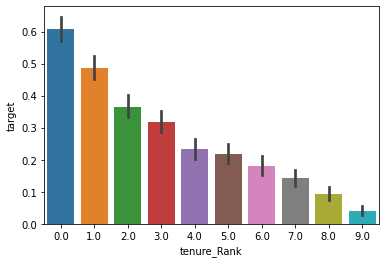

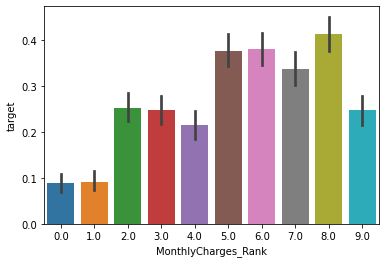

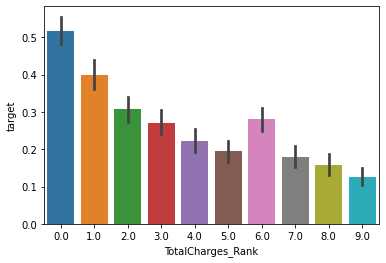

In [74]:
from numpy import mean

for col in (X_num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="target", data=X_bin_combined, estimator=mean)
plt.show()

With increase in totalcharges_rank churn rate decreases- this is because if the customers are more coupled with the company (as they will be using other services) then they are less likely to leave the telecom

In [75]:
select_features_df_num = X_num1

In [76]:
X_num1.shape

(7043, 3)

Feature Selection- Categorical Features

In [77]:
X_cat.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

Bi-variate analysis

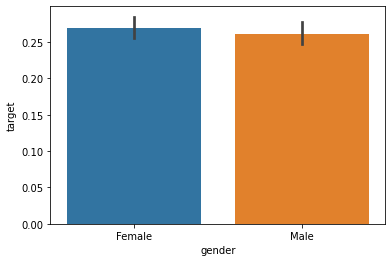

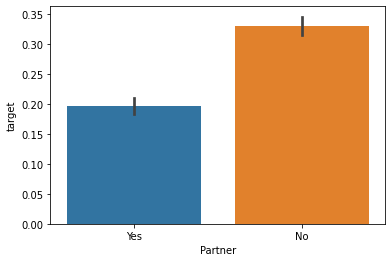

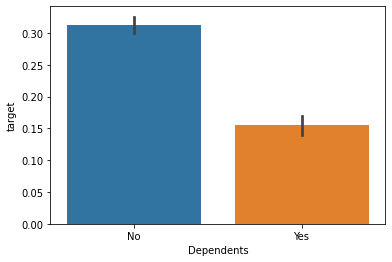

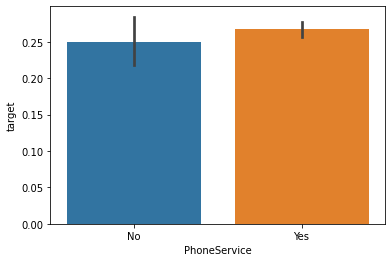

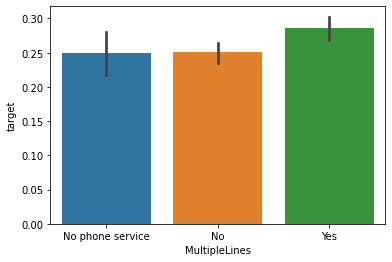

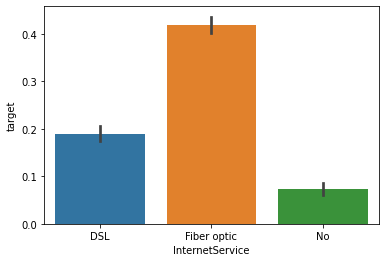

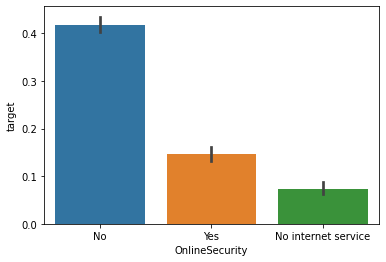

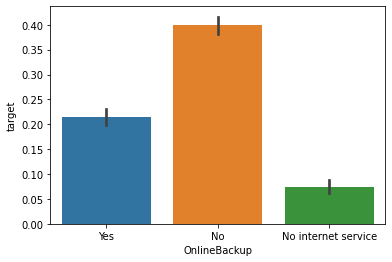

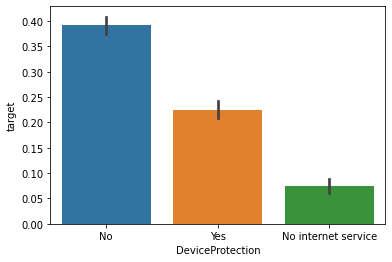

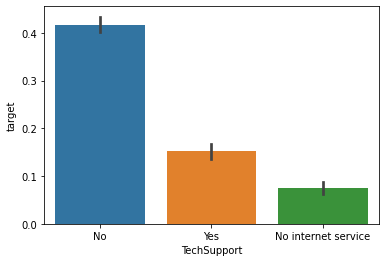

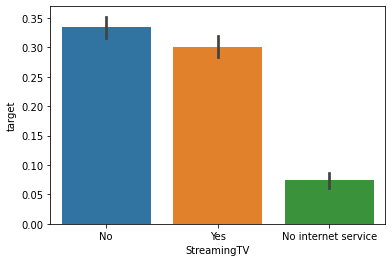

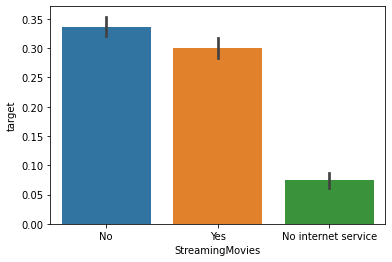

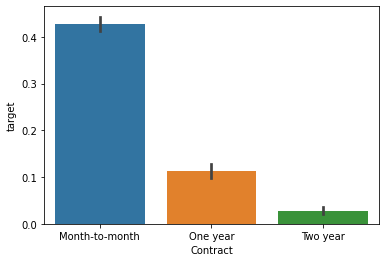

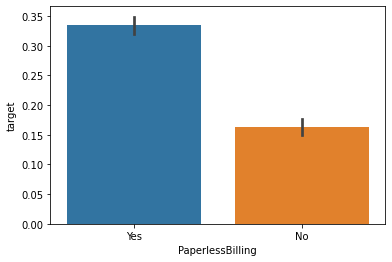

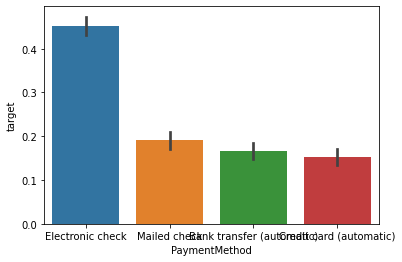

In [78]:
X_cat_merged = pd.concat([Y, X_cat], axis=1, join='inner')

for col in X_cat.columns:
    plt.figure()
    sns.barplot(x=col, y="target", data=X_cat_merged, estimator=mean)
plt.show()

Dropping- Gender, Phoneservice and multiplelines
As they don't show much variability

The fiber optic internetservice shows more churn rate, it maybe due to some technical problems in the fibre cable or internet speed is low.

In [79]:
X_cat.drop(['gender', 'PhoneService', 'MultipleLines'], axis=1, inplace=True)

In [80]:
X_cat_dummy = pd.get_dummies(X_cat, drop_first=True)
X_cat_dummy.shape

(7043, 22)

Part-2 Select K Best

In [81]:
#Select K best for categorical features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_cat_dummy, Y)
#Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_cat_dummy.iloc[:, cols]

In [82]:
select_features_df_char.head()

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


Feature Selection - Numerical Indicator Features

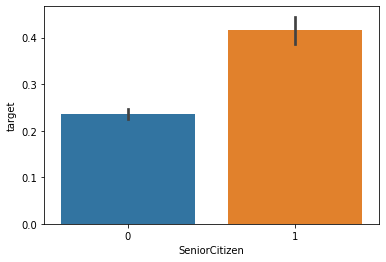

In [83]:
X_ind_merged = pd.concat([Y, ind], axis=1, join="inner")
for col in ind.columns:
    plt.figure()
    sns.barplot(x=col, y="target", data=X_ind_merged, estimator=mean)
plt.show()

In [84]:
select_features_df_ind=ind

# Creating the Master Feature Set for Model Development

In [85]:
X_all = pd.concat([select_features_df_char, select_features_df_ind, select_features_df_num], axis=1, join='inner')

In [86]:
X_all

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,29.85,49.070
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,34,56.95,1889.500
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,2,53.85,108.150
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,45,42.30,1840.750
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2,70.70,151.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,24,84.80,1990.500
7039,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,72,103.20,6921.025
7040,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,11,29.60,346.450
7041,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,4,74.40,306.600


In [87]:
Y['target'].value_counts()

0    5174
1    1869
Name: target, dtype: int64

# Train Test Split

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [99]:
print("Shape of Training Data: ", X_train.shape)
print("Shape of Testing Data: ", X_test.shape)
print("Response Rate in Training Data", y_train.mean())
print("Response Rate in Testing Data", y_test.mean())
#as in overall target data my churning rate was 26% so 
#after splitting my training and testing data should
#also contain 26% churning rate, that way we can say
#the splitting went just fine

Shape of Training Data:  (4930, 24)
Shape of Testing Data:  (2113, 24)
Response Rate in Training Data target    0.266126
dtype: float64
Response Rate in Testing Data target    0.263606
dtype: float64


In [100]:
#Non Linearity in feature relationships are observed which makes tree methods a good choice
#There are few options to consider among tree methods
#White Box(Completely Explainable Set of Rules) - Decision Tree
#Ensemble Methods - Random Forest (With Bagging); GBM/XGBoost(Boosting) 

In [101]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [102]:
coef_df = pd.DataFrame(X_all.columns)
coef_df.columns = ['features']
coef_df['Coefficient Estimate'] = pd.Series(lg.coef_[0])
coef_df

,features,Coefficient Estimate
0,Partner_Yes,-0.015331
1,Dependents_Yes,-0.147224
2,InternetService_Fiber optic,0.530868
3,InternetService_No,-0.164614
4,OnlineSecurity_No internet service,-0.164614
5,OnlineSecurity_Yes,-0.573388
6,OnlineBackup_No internet service,-0.164614
7,OnlineBackup_Yes,-0.277329
8,DeviceProtection_No internet service,-0.164614
9,DeviceProtection_Yes,-0.084397


In [103]:
#Building a decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', random_state=0)

In [104]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
tree_grid = GridSearchCV(dtree, cv=10, param_grid=param_dist, n_jobs=3)
tree_grid.fit(X_train, y_train)
print('Best Parameters using grid search : \n', tree_grid.best_params_)

Best Parameters using grid search : 
 {'max_depth': 6, 'min_samples_split': 50}


In [105]:
dtree = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=6, min_samples_split=50)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50, random_state=0)

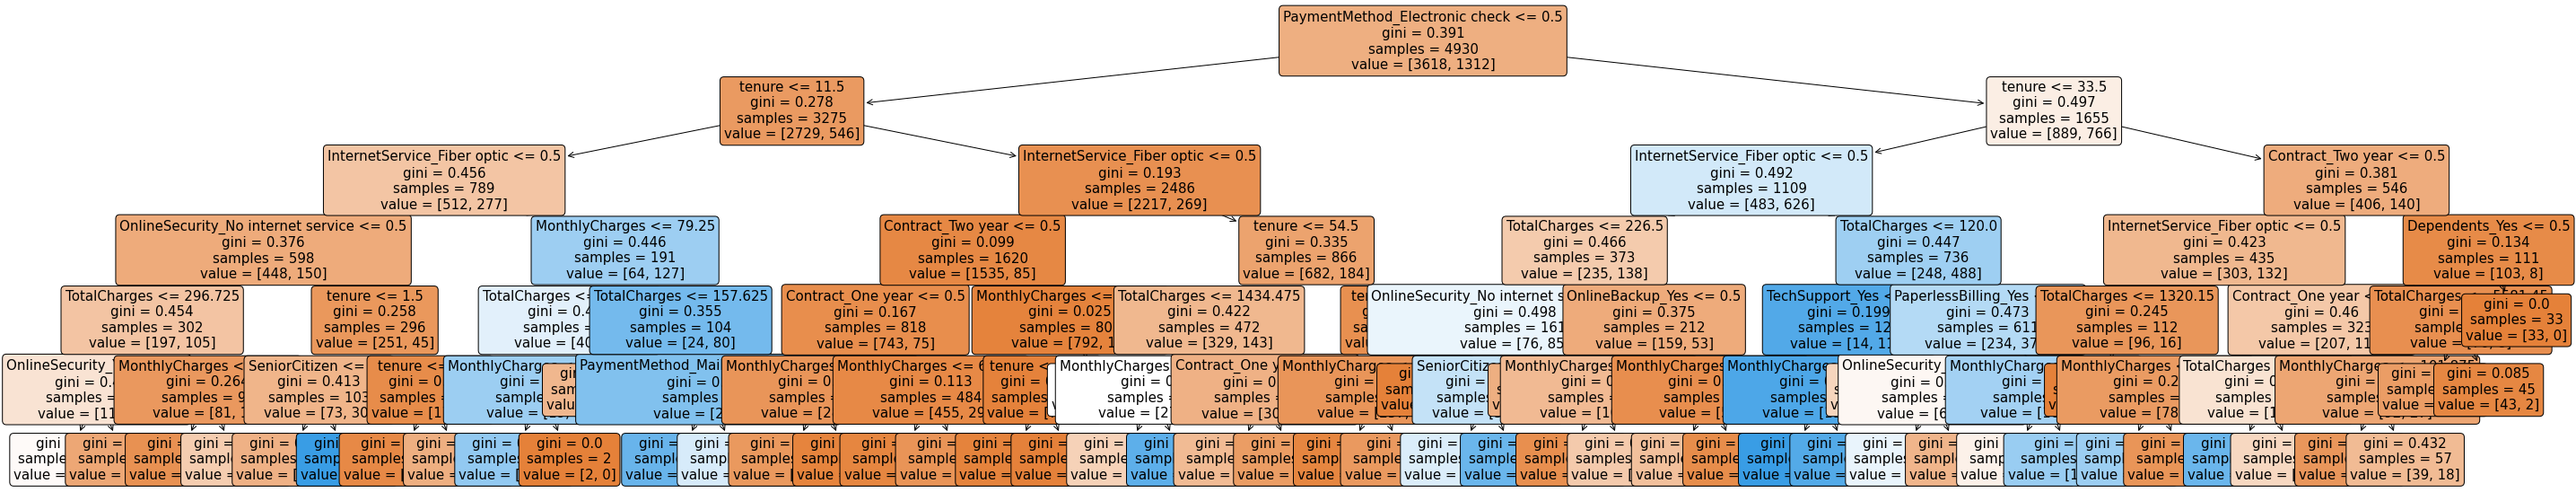

In [106]:
from sklearn import tree
import pydotplus
plt.figure(figsize=[50, 10])
tree.plot_tree(dtree, filled=True, fontsize=15, rounded=True, feature_names=X_all.columns)
plt.show()

In [107]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', random_state=0, max_depth=6, min_samples_split=50)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [108]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                  index=X_train.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
tenure,0.213428
TotalCharges,0.132617
InternetService_Fiber optic,0.105408
PaymentMethod_Electronic check,0.102892
Contract_Two year,0.079145
MonthlyCharges,0.076496
OnlineSecurity_Yes,0.046278
Contract_One year,0.035784
InternetService_No,0.030586
TechSupport_Yes,0.024640


In [109]:
#Building a gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(criterion='mse', random_state=0, max_depth=6, min_samples_split=50)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

In [110]:
import pandas as pd
feature_importances = pd.DataFrame(gbm.feature_importances_,
                                  index=X_train.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
tenure,0.213515
MonthlyCharges,0.178030
TotalCharges,0.167504
PaymentMethod_Electronic check,0.135038
InternetService_Fiber optic,0.128254
Contract_Two year,0.035086
Contract_One year,0.033599
PaperlessBilling_Yes,0.019744
OnlineSecurity_Yes,0.016785
TechSupport_Yes,0.014611


In [111]:
base_learners = [
    ('rf', RandomForestClassifier(criterion='gini', random_state=0, max_depth=6, min_samples_split=50)),
    ('gbm', GradientBoostingClassifier(criterion='mse', random_state=0, max_depth=6, min_samples_split=50))
]

In [112]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [113]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=50,
                                                       random_state=0)),
                               ('gbm',
                                GradientBoostingClassifier(criterion='mse',
                                                           max_depth=6,
                                                           min_samples_split=50,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

In [114]:
# Model Evaluation
y_pred_lg = lg.predict(X_test)
y_pred_tree = dtree.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbm = gbm.predict(X_test)
y_pred_stacking = clf.predict(X_test)

In [115]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [116]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_lg))
print("Precision:", metrics.precision_score(y_test, y_pred_lg))
print("Recall:", metrics.recall_score(y_test, y_pred_lg))
print("F1_score:", metrics.f1_score(y_test, y_pred_lg))

Accuracy: 0.7950780880265026
Precision: 0.6402714932126696
Recall: 0.5080789946140036
F1_score: 0.5665665665665666


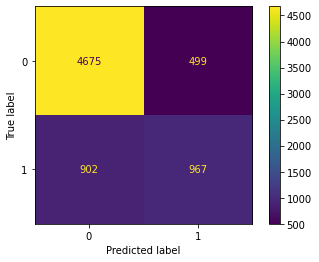

In [117]:
metrics.plot_confusion_matrix(lg, X_all, Y)

In [118]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))
print("Precision:", metrics.precision_score(y_test, y_pred_tree))
print("Recall:", metrics.recall_score(y_test, y_pred_tree))
print("F1_score:", metrics.f1_score(y_test, y_pred_tree))

Accuracy: 0.7950780880265026
Precision: 0.6483253588516746
Recall: 0.4865350089766607
F1_score: 0.5558974358974359


In [119]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:", metrics.precision_score(y_test, y_pred_rf))
print("Recall:", metrics.recall_score(y_test, y_pred_rf))
print("F1_score:", metrics.f1_score(y_test, y_pred_rf))

Accuracy: 0.7960246095598675
Precision: 0.6607142857142857
Recall: 0.4649910233393178
F1_score: 0.5458377239199157


In [120]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision:", metrics.precision_score(y_test, y_pred_gbm))
print("Recall:", metrics.recall_score(y_test, y_pred_gbm))
print("F1_score:", metrics.f1_score(y_test, y_pred_gbm))

Accuracy: 0.7993374349266446
Precision: 0.6423982869379015
Recall: 0.5385996409335727
F1_score: 0.5859375


In [121]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_stacking))
print("Precision:", metrics.precision_score(y_test, y_pred_stacking))
print("Recall:", metrics.recall_score(y_test, y_pred_stacking))
print("F1_score:", metrics.f1_score(y_test, y_pred_stacking))

Accuracy: 0.8002839564600095
Precision: 0.6566125290023201
Recall: 0.5080789946140036
F1_score: 0.5728744939271255


In [124]:
#Recommendations
#Device Protection with Online Services
# Convert customer to DSL if they are facing challenges with fier optics
# Offer discounts on Yearly contracts